In [1]:
from tensorflow.python.client import device_lib
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost
from sklearn.linear_model import RidgeClassifier
import pandas.api.types as ptypes
import math,shutil
from sklearn.impute import SimpleImputer
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.stats import norm, skew
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer,FunctionTransformer

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"

print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Show System RAM Memory:


MemTotal:       13333552 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17308774485672889707
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6574493506038710186
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15350712330682060180
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10134248067036522324
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 44kB/s 


In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
print(train.shape,test.shape)
train.head(5)

(318438, 18) (137057, 17)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
# CHECK UNIQUE VALUES

train.apply(lambda x : len(x.unique()))

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 5
patientid                             92017
City_Code_Patient                        38
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [5]:
#CHECK NA#
sd=train.isnull().sum()/len(train)*100
sd.head(30)

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [6]:
#VALUE COUNTS TRAIN COLUMNS#
dj={'Hospital_type_code','City_Code_Hospital','Bed Grade'	,'Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age','Stay'}
for i in dj:
  print(i.upper())
  print(train[i].value_counts())
  print("______________________________________\n")

HOSPITAL_TYPE_CODE
a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
______________________________________

TYPE OF ADMISSION
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64
______________________________________

BED GRADE
2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64
______________________________________

WARD_TYPE
R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64
______________________________________

CITY_CODE_HOSPITAL
1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64
______________________________________

WARD_FACILITY_CODE
F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64
______________

In [ ]:
#VALUE COUNTS TEST COLUMNS#
dj={'Hospital_type_code','City_Code_Hospital','Bed Grade'	,'Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','City_Code_Patient','Age'}
for i in dj:
  print(i.upper())
  print(train[i].value_counts())
  print("______________________________________\n")

CITY_CODE_HOSPITAL
1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64
______________________________________

CITY_CODE_PATIENT
8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64
______________________________________

TYPE OF ADMISSION
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64
___

In [7]:
#Missing Value Treatment#
train['Bed Grade'] = train['Bed Grade'].fillna( train['Bed Grade'].dropna().mode().values[0] )
test['Bed Grade'] = test['Bed Grade'].fillna( test['Bed Grade'].dropna().mode().values[0] )
train['City_Code_Patient'] = train['City_Code_Patient'].fillna( train['City_Code_Patient'].dropna().mode().values[0] )
test['City_Code_Patient'] = test['City_Code_Patient'].fillna( test['City_Code_Patient'].dropna().mode().values[0] )
train=train.drop(['patientid'],axis=1)
test=test.drop(['patientid'],axis=1)

In [ ]:
#EDA#
## SEPEARTION CATEGORY VS NUMERIC

#OUTLIER HANDLER
def out_quant(x):
    d=np.arange(0,1,0.01)
    ds=x.quantile(d)
    return ds

continuous = []
cat = []

for i in train.columns:
    if train[i].dtype == "object":
        cat.append(i)
    else: continuous.append(i)

print("Continuous:", continuous)
print("-")
print("Categorical:", cat)

Continuous: ['case_id', 'Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']
-
Categorical: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


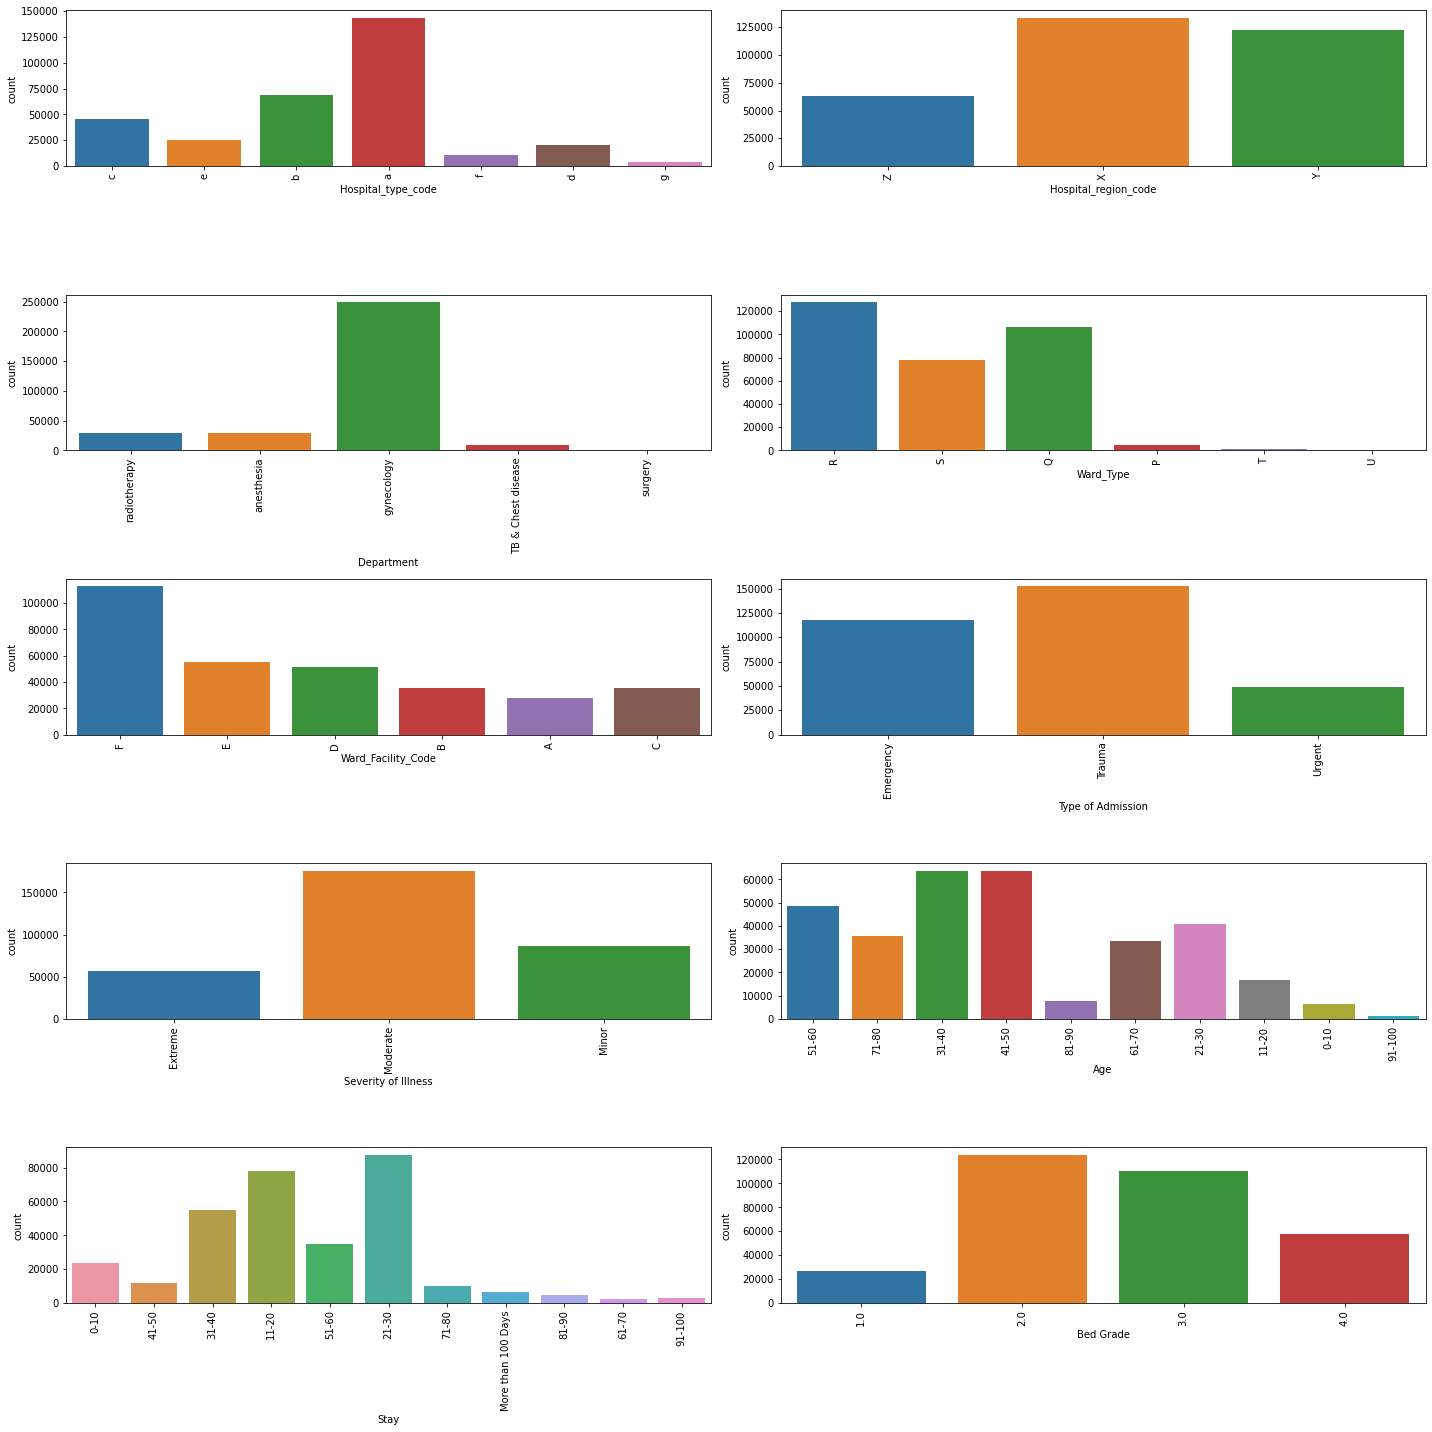

In [ ]:
ct=['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
    'Type of Admission', 'Severity of Illness', 'Age', 'Stay','Bed Grade']
fig, ax=plt.subplots(5,2,figsize=(20,20))
for variable,subplot in zip(ct,ax.flatten()):
    sns.countplot(train[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
               
plt.tight_layout()
plt.show()

In [8]:
#LABEL ENCODING#
lk={'Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
    'Severity of Illness','Age'}
for i in lk:
    train[i]=train[i].astype(str)


for col in lk:
    lbl_enc = LabelEncoder() 
    train[col] = lbl_enc.fit_transform(train[col])


for i in lk:
    test[i]=test[i].astype(str)


for col in lk:
    lbl_enc = LabelEncoder() 
    test[col] = lbl_enc.fit_transform(test[col])    
    

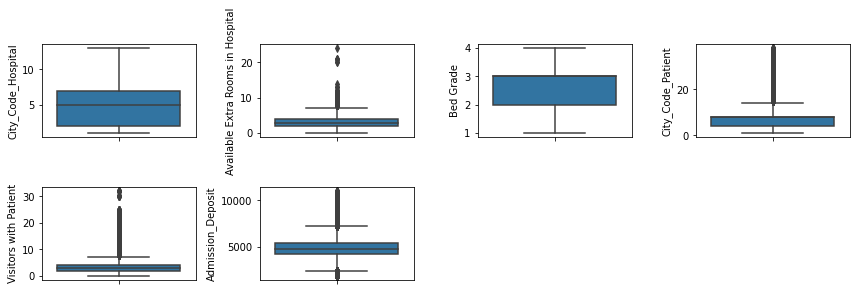

In [9]:
#NUMERIC#
######BOXPLOTS VISUALISATION####
num=['City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']
numerical_features = train[num]
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [10]:
#OUTLIER TREATMENT#
train.Admission_Deposit.loc[train.Admission_Deposit > 8344.0]=8344.0
train.Admission_Deposit.loc[train.Admission_Deposit < 2741.0]=2741.0
test.Admission_Deposit.loc[test.Admission_Deposit > 8308.0]=8308.0
test.Admission_Deposit.loc[test.Admission_Deposit < 2749.0]=2749.0

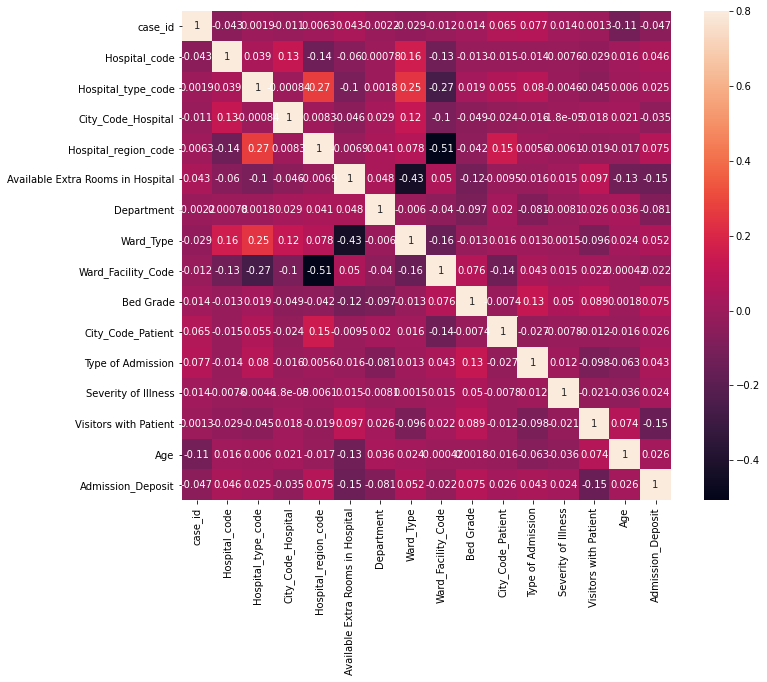

In [11]:
#CORRELATION#
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

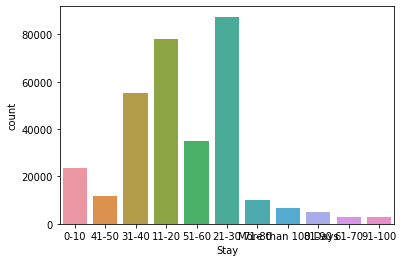

In [ ]:
#TARGET VARIABLE#
sns.countplot(train['Stay'])

In [12]:
#TARGET TRANSFORMATION#
target_map = {'21-30':0, '11-20':1, '31-40':2,'51-60':3,'0-10':4,'41-50':5,'71-80':6,'More than 100 Days':7,'81-90':8,
              '91-100':9,'61-70':10}
target_map_inverse = {0:'21-30', 1:'11-20', 2:'31-40',3:'51-60',4:'0-10',5:'41-50',6:'71-80',7:'More than 100 Days',8:'81-90',
                      9:'91-100',10:'61-70'}
gs={'Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
    'Severity of Illness','Age','Bed Grade','City_Code_Hospital'}

master = pd.concat([train.drop(['Stay'],axis=1),test])
master=master.drop(['case_id'],axis=1)
master=pd.get_dummies(master,columns=gs)
master.head()

,Hospital_code,Available Extra Rooms in Hospital,City_Code_Patient,Visitors with Patient,Admission_Deposit,Hospital_type_code_0,Hospital_type_code_1,Hospital_type_code_2,Hospital_type_code_3,Hospital_type_code_4,Hospital_type_code_5,Hospital_type_code_6,Hospital_region_code_0,Hospital_region_code_1,Hospital_region_code_2,Type of Admission_0,Type of Admission_1,Type of Admission_2,Bed Grade_1.0,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,Department_0,Department_1,Department_2,Department_3,Department_4,Ward_Type_0,Ward_Type_1,Ward_Type_2,Ward_Type_3,Ward_Type_4,Ward_Type_5,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13,Ward_Facility_Code_0,Ward_Facility_Code_1,Ward_Facility_Code_2,Ward_Facility_Code_3,Ward_Facility_Code_4,Ward_Facility_Code_5,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Severity of Illness_0,Severity of Illness_1,Severity of Illness_2
0,8,3,7.0,2,4911.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,2,7.0,2,5954.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,10,2,7.0,2,4745.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,26,2,7.0,2,7272.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,26,2,7.0,2,5558.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [13]:
#MODEL BUILDING#
X, y = master.iloc[:len(train)], train['Stay']
y=y.map(target_map)
X_test = master.iloc[len(train):]
print(X.shape,X_test.shape)

(318438, 63) (137057, 63)


In [14]:
#SCALING#
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [15]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':11,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'verbosity': 1
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)
predictions = np.zeros((len(X_test), 11))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X,y)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X[trn_idx], label=y[trn_idx])
    val_data = lgb.Dataset(X[val_idx], label=y[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    predictions_val = np.argmax(clf.predict(X[val_idx], num_iteration=clf.best_iteration), axis=1)
    
    print("CV score: {:<8.5f}".format(accuracy_score(predictions_val, y.iloc[val_idx])))
    
    predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
Training until validation scores don't improve for 1000 rounds.
[1000]	training's multi_logloss: 1.49075	valid_1's multi_logloss: 1.52545
[2000]	training's multi_logloss: 1.43418	valid_1's multi_logloss: 1.49855
[3000]	training's multi_logloss: 1.40019	valid_1's multi_logloss: 1.49156
[4000]	training's multi_logloss: 1.3719	valid_1's multi_logloss: 1.48882
[5000]	training's multi_logloss: 1.34675	valid_1's multi_logloss: 1.48773
[6000]	training's multi_logloss: 1.32377	valid_1's multi_logloss: 1.48769
Early stopping, best iteration is:
[5860]	training's multi_logloss: 1.3269	valid_1's multi_logloss: 1.48765
CV score: 0.42840 
Fold 1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's multi_logloss: 1.48972	valid_1's multi_logloss: 1.52937
[2000]	training's multi_logloss: 1.43324	valid_1's multi_logloss: 1.50322
[3000]	training's multi_logloss: 1.3993	valid_1's multi_logloss: 1.49654
[4000]	training's multi_logloss: 1.37109	valid_1's multi_logloss: 1

In [17]:
predictions_test = np.argmax(predictions, axis=1)
submission = pd.read_csv("/content/sample_submission_lfbv3c3.csv")
submission["Stay"] = predictions_test
submission["Stay"] = submission["Stay"].map(target_map_inverse)
submission.to_csv("janatahack_health.csv", index=False)
submission.shape

(137057, 2)